## Machine Learning model to Igneous Rock Classification task

In [1]:
# import libraries
import xgboost
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import shap
import sklearn as tree
from sklearn.preprocessing import LabelEncoder,Normalizer,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
np.bool = np.bool_


shap.initjs()

D:\CONICET\Geology\XAI\Anaconda Geology\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
D:\CONICET\Geology\XAI\Anaconda Geology\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [2]:
# upload train data (Gaby,2022)
df_train = pd.read_csv('CT-VR_train.csv', sep = ';')
df_train.head()

Al2O3 (% e.p.)  Fe2O3 (% e.p.)  MnO (% e.p.)  MgO (% e.p.)  Cao (% e.p.)  \
0            5.49           10.25         0.188         18.55         10.13   
1           17.93            8.80         0.150         10.28         13.04   
2           20.10            7.40         0.125          8.24         13.52   
3           14.95           11.25         0.184         10.11         10.19   
4           17.56            8.84         0.149         10.60         10.60   

   Na2O (% e.p.)  K2O (% e.p.)  TiO2 (% e.p.)  P2O5 (% e.p.)  Cr2O3 (% e.p.)  \
0           0.38          0.20          0.278           0.01        0.146145   
1           0.71          0.09          0.187           0.01        0.021922   
2           0.77          0.11          0.156           0.01        0.011692   
3           0.89          0.35          0.309           0.03        0.073072   
4           0.68          0.10          0.187           0.02        0.024845   

   Sc (ppm)  V (ppm)  Co (ppm)  Ni (ppm)  Cu (ppm)  Zn (ppm)  Ga (ppm)  \
0        59      203      62.0       120       130        60       7.0   
1        39      148      47.0        40        60        60      14.0   
2        32      128      40.0        40        60        60      15.0   
3        38      318      32.0       120        50        80      15.0   
4        34      140      51.0        30        60        60      14.0   

   Sr (ppm)  Ba (ppm) Roca  
0      38.0      25.0   UM  
1     168.0      18.0    M  
2     216.0      15.0    M  
3     162.0      52.0    M  
4     185.0      27.0    M

Al2O3 (% e.p.)  Fe2O3 (% e.p.)  MnO (% e.p.)  MgO (% e.p.)  Cao (% e.p.)  \
0            5.49           10.25         0.188         18.55         10.13   
1           17.93            8.80         0.150         10.28         13.04   
2           20.10            7.40         0.125          8.24         13.52   
3           14.95           11.25         0.184         10.11         10.19   
4           17.56            8.84         0.149         10.60         10.60   

   Na2O (% e.p.)  K2O (% e.p.)  TiO2 (% e.p.)  P2O5 (% e.p.)  Cr2O3 (% e.p.)  \
0           0.38          0.20          0.278           0.01        0.146145   
1           0.71          0.09          0.187           0.01        0.021922   
2           0.77          0.11          0.156           0.01        0.011692   
3           0.89          0.35          0.309           0.03        0.073072   
4           0.68          0.10          0.187           0.02        0.024845   

   Sc (ppm)  V (ppm)  Co (ppm)  Ni (ppm)  Cu (ppm)  Zn (ppm)  Ga (ppm)  \
0        59      203      62.0       120       130        60       7.0   
1        39      148      47.0        40        60        60      14.0   
2        32      128      40.0        40        60        60      15.0   
3        38      318      32.0       120        50        80      15.0   
4        34      140      51.0        30        60        60      14.0   

   Sr (ppm)  Ba (ppm) Roca  
0      38.0      25.0   UM  
1     168.0      18.0    M  
2     216.0      15.0    M  
3     162.0      52.0    M  
4     185.0      27.0    M

####  <span style='background :#39ff14' > CT-EF08_001 data test</span>

In [3]:
#upload test data (Juan,2023)
df_test = pd.read_excel('CT-EF08_001.xlsx')
df_test.head()

Al2O3 (% e.p.)  Fe2O3 (% e.p.)  MnO (% e.p.)  MgO (% e.p.)  Cao (% e.p.)  \
0       12.454131       12.524168   2053.105884     15.617101      5.890548   
1       12.132763       13.696417   2227.409132     18.153497      6.296262   
2       12.378600       13.839562   2117.679691     18.319516      6.897992   
3       12.076106       13.038801   2072.465384     18.070661      7.387637   
4       10.904546       12.924596   1723.849073     16.280388      6.422292   

   Na2O (% e.p.)  K2O (% e.p.)  TiO2 (% e.p.)  P2O5 (% e.p.)  Cr2O3 (% e.p.)  \
0       0.458269      0.481841       0.400329       0.041240      1069.78140   
1       0.471744      0.373424       0.417006       0.009164      1272.92295   
2       0.606536      0.614351       0.633857       0.025203      1338.68820   
3       0.606530      0.481839       0.533769       0.009164      1214.46495   
4       0.620017      0.578214       0.700581       0.018329      1163.31420   

   Sc (ppm)  V (ppm)  Co (ppm)  Ni (ppm)  Cu (ppm)  Zn (ppm)  Ga (ppm)  \
0        39      226        59       176        82       124        10   
1        40      221        71       195        98       119        10   
2        51      306        75       216       112       119        20   
3        42      242        68       225       118       111        10   
4        50      315        74       258       206       128        10   

   Sr (ppm)  Ba (ppm)  
0       107       120  
1       112       130  
2       100       120  
3       106        80  
4        74        40

Al2O3 (% e.p.)  Fe2O3 (% e.p.)  MnO (% e.p.)  MgO (% e.p.)  Cao (% e.p.)  \
0       12.454131       12.524168   2053.105884     15.617101      5.890548   
1       12.132763       13.696417   2227.409132     18.153497      6.296262   
2       12.378600       13.839562   2117.679691     18.319516      6.897992   
3       12.076106       13.038801   2072.465384     18.070661      7.387637   
4       10.904546       12.924596   1723.849073     16.280388      6.422292   

   Na2O (% e.p.)  K2O (% e.p.)  TiO2 (% e.p.)  P2O5 (% e.p.)  Cr2O3 (% e.p.)  \
0       0.458269      0.481841       0.400329       0.041240      1069.78140   
1       0.471744      0.373424       0.417006       0.009164      1272.92295   
2       0.606536      0.614351       0.633857       0.025203      1338.68820   
3       0.606530      0.481839       0.533769       0.009164      1214.46495   
4       0.620017      0.578214       0.700581       0.018329      1163.31420   

   Sc (ppm)  V (ppm)  Co (ppm)  Ni (ppm)  Cu (ppm)  Zn (ppm)  Ga (ppm)  \
0        39      226        59       176        82       124        10   
1        40      221        71       195        98       119        10   
2        51      306        75       216       112       119        20   
3        42      242        68       225       118       111        10   
4        50      315        74       258       206       128        10   

   Sr (ppm)  Ba (ppm)  
0       107       120  
1       112       130  
2       100       120  
3       106        80  
4        74        40

In [4]:
# correlation matrix
corr = df_train.corr()
corr

Al2O3 (% e.p.)  Fe2O3 (% e.p.)  MnO (% e.p.)  MgO (% e.p.)  \
Al2O3 (% e.p.)        1.000000       -0.584607     -0.686951     -0.933096   
Fe2O3 (% e.p.)       -0.584607        1.000000      0.761664      0.568955   
MnO (% e.p.)         -0.686951        0.761664      1.000000      0.632073   
MgO (% e.p.)         -0.933096        0.568955      0.632073      1.000000   
Cao (% e.p.)          0.681160       -0.770722     -0.715896     -0.783145   
Na2O (% e.p.)         0.774409       -0.401052     -0.470524     -0.856353   
K2O (% e.p.)          0.239654        0.038456     -0.019023     -0.355888   
TiO2 (% e.p.)         0.346562        0.189673     -0.011819     -0.499653   
P2O5 (% e.p.)         0.218772        0.053316      0.101514     -0.344280   
Cr2O3 (% e.p.)       -0.883383        0.339905      0.523264      0.867299   
Sc (ppm)             -0.597287        0.320812      0.356942      0.351456   
V (ppm)               0.099863        0.337203      0.114821     -0.295213   
Co (ppm)             -0.703286        0.601890      0.522276      0.791927   
Ni (ppm)             -0.680072        0.399342      0.474560      0.725160   
Cu (ppm)             -0.322216        0.132591      0.124769      0.356852   
Zn (ppm)             -0.044941        0.444465      0.339041      0.045508   
Ga (ppm)              0.893368       -0.306912     -0.480630     -0.918388   
Sr (ppm)              0.925743       -0.489924     -0.579152     -0.882454   
Ba (ppm)             -0.066831        0.054588      0.146563      0.032713   

                Cao (% e.p.)  Na2O (% e.p.)  K2O (% e.p.)  TiO2 (% e.p.)  \
Al2O3 (% e.p.)      0.681160       0.774409      0.239654       0.346562   
Fe2O3 (% e.p.)     -0.770722      -0.401052      0.038456       0.189673   
MnO (% e.p.)       -0.715896      -0.470524     -0.019023      -0.011819   
MgO (% e.p.)       -0.783145      -0.856353     -0.355888      -0.499653   
Cao (% e.p.)        1.000000       0.658853      0.192211       0.301688   
Na2O (% e.p.)       0.658853       1.000000      0.664570       0.578501   
K2O (% e.p.)        0.192211       0.664570      1.000000       0.419819   
TiO2 (% e.p.)       0.301688       0.578501      0.419819       1.000000   
P2O5 (% e.p.)       0.171427       0.384265      0.359625       0.498457   
Cr2O3 (% e.p.)     -0.544615      -0.711002     -0.272772      -0.420879   
Sc (ppm)           -0.039180      -0.283195      0.071066       0.121408   
V (ppm)             0.182535       0.347945      0.332114       0.797279   
Co (ppm)           -0.712349      -0.676779     -0.227589      -0.393927   
Ni (ppm)           -0.566364      -0.607062     -0.205455      -0.366406   
Cu (ppm)           -0.160095      -0.330438     -0.116064      -0.256345   
Zn (ppm)           -0.272944       0.038967      0.107372       0.246038   
Ga (ppm)            0.563057       0.828302      0.412596       0.619813   
Sr (ppm)            0.646969       0.790221      0.249043       0.497652   
Ba (ppm)           -0.057868       0.117108      0.184408       0.142306   

                P2O5 (% e.p.)  Cr2O3 (% e.p.)  Sc (ppm)   V (ppm)  Co (ppm)  \
Al2O3 (% e.p.)       0.218772       -0.883383 -0.597287  0.099863 -0.703286   
Fe2O3 (% e.p.)       0.053316        0.339905  0.320812  0.337203  0.601890   
MnO (% e.p.)         0.101514        0.523264  0.356942  0.114821  0.522276   
MgO (% e.p.)        -0.344280        0.867299  0.351456 -0.295213  0.791927   
Cao (% e.p.)         0.171427       -0.544615 -0.039180  0.182535 -0.712349   
Na2O (% e.p.)        0.384265       -0.711002 -0.283195  0.347945 -0.676779   
K2O (% e.p.)         0.359625       -0.272772  0.071066  0.332114 -0.227589   
TiO2 (% e.p.)        0.498457       -0.420879  0.121408  0.797279 -0.393927   
P2O5 (% e.p.)        1.000000       -0.193991  0.007341  0.367701 -0.358602   
Cr2O3 (% e.p.)      -0.193991        1.000000  0.390371 -0.253749  0.597179   
Sc (ppm)             0.007341        0.390371  1.000000  0.350480

Al2O3 (% e.p.)  Fe2O3 (% e.p.)  MnO (% e.p.)  MgO (% e.p.)  \
Al2O3 (% e.p.)        1.000000       -0.584607     -0.686951     -0.933096   
Fe2O3 (% e.p.)       -0.584607        1.000000      0.761664      0.568955   
MnO (% e.p.)         -0.686951        0.761664      1.000000      0.632073   
MgO (% e.p.)         -0.933096        0.568955      0.632073      1.000000   
Cao (% e.p.)          0.681160       -0.770722     -0.715896     -0.783145   
Na2O (% e.p.)         0.774409       -0.401052     -0.470524     -0.856353   
K2O (% e.p.)          0.239654        0.038456     -0.019023     -0.355888   
TiO2 (% e.p.)         0.346562        0.189673     -0.011819     -0.499653   
P2O5 (% e.p.)         0.218772        0.053316      0.101514     -0.344280   
Cr2O3 (% e.p.)       -0.883383        0.339905      0.523264      0.867299   
Sc (ppm)             -0.597287        0.320812      0.356942      0.351456   
V (ppm)               0.099863        0.337203      0.114821     -0.295213   
Co (ppm)             -0.703286        0.601890      0.522276      0.791927   
Ni (ppm)             -0.680072        0.399342      0.474560      0.725160   
Cu (ppm)             -0.322216        0.132591      0.124769      0.356852   
Zn (ppm)             -0.044941        0.444465      0.339041      0.045508   
Ga (ppm)              0.893368       -0.306912     -0.480630     -0.918388   
Sr (ppm)              0.925743       -0.489924     -0.579152     -0.882454   
Ba (ppm)             -0.066831        0.054588      0.146563      0.032713   

                Cao (% e.p.)  Na2O (% e.p.)  K2O (% e.p.)  TiO2 (% e.p.)  \
Al2O3 (% e.p.)      0.681160       0.774409      0.239654       0.346562   
Fe2O3 (% e.p.)     -0.770722      -0.401052      0.038456       0.189673   
MnO (% e.p.)       -0.715896      -0.470524     -0.019023      -0.011819   
MgO (% e.p.)       -0.783145      -0.856353     -0.355888      -0.499653   
Cao (% e.p.)        1.000000       0.658853      0.192211       0.301688   
Na2O (% e.p.)       0.658853       1.000000      0.664570       0.578501   
K2O (% e.p.)        0.192211       0.664570      1.000000       0.419819   
TiO2 (% e.p.)       0.301688       0.578501      0.419819       1.000000   
P2O5 (% e.p.)       0.171427       0.384265      0.359625       0.498457   
Cr2O3 (% e.p.)     -0.544615      -0.711002     -0.272772      -0.420879   
Sc (ppm)           -0.039180      -0.283195      0.071066       0.121408   
V (ppm)             0.182535       0.347945      0.332114       0.797279   
Co (ppm)           -0.712349      -0.676779     -0.227589      -0.393927   
Ni (ppm)           -0.566364      -0.607062     -0.205455      -0.366406   
Cu (ppm)           -0.160095      -0.330438     -0.116064      -0.256345   
Zn (ppm)           -0.272944       0.038967      0.107372       0.246038   
Ga (ppm)            0.563057       0.828302      0.412596       0.619813   
Sr (ppm)            0.646969       0.790221      0.249043       0.497652   
Ba (ppm)           -0.057868       0.117108      0.184408       0.142306   

                P2O5 (% e.p.)  Cr2O3 (% e.p.)  Sc (ppm)   V (ppm)  Co (ppm)  \
Al2O3 (% e.p.)       0.218772       -0.883383 -0.597287  0.099863 -0.703286   
Fe2O3 (% e.p.)       0.053316        0.339905  0.320812  0.337203  0.601890   
MnO (% e.p.)         0.101514        0.523264  0.356942  0.114821  0.522276   
MgO (% e.p.)        -0.344280        0.867299  0.351456 -0.295213  0.791927   
Cao (% e.p.)         0.171427       -0.544615 -0.039180  0.182535 -0.712349   
Na2O (% e.p.)        0.384265       -0.711002 -0.283195  0.347945 -0.676779   
K2O (% e.p.)         0.359625       -0.272772  0.071066  0.332114 -0.227589   
TiO2 (% e.p.)        0.498457       -0.420879  0.121408  0.797279 -0.393927   
P2O5 (% e.p.)        1.000000       -0.193991  0.007341  0.367701 -0.358602   
Cr2O3 (% e.p.)      -0.193991        1.000000  0.390371 -0.253749  0.597179   
Sc (ppm)             0.007341        0.390371  1.000000  0.350480

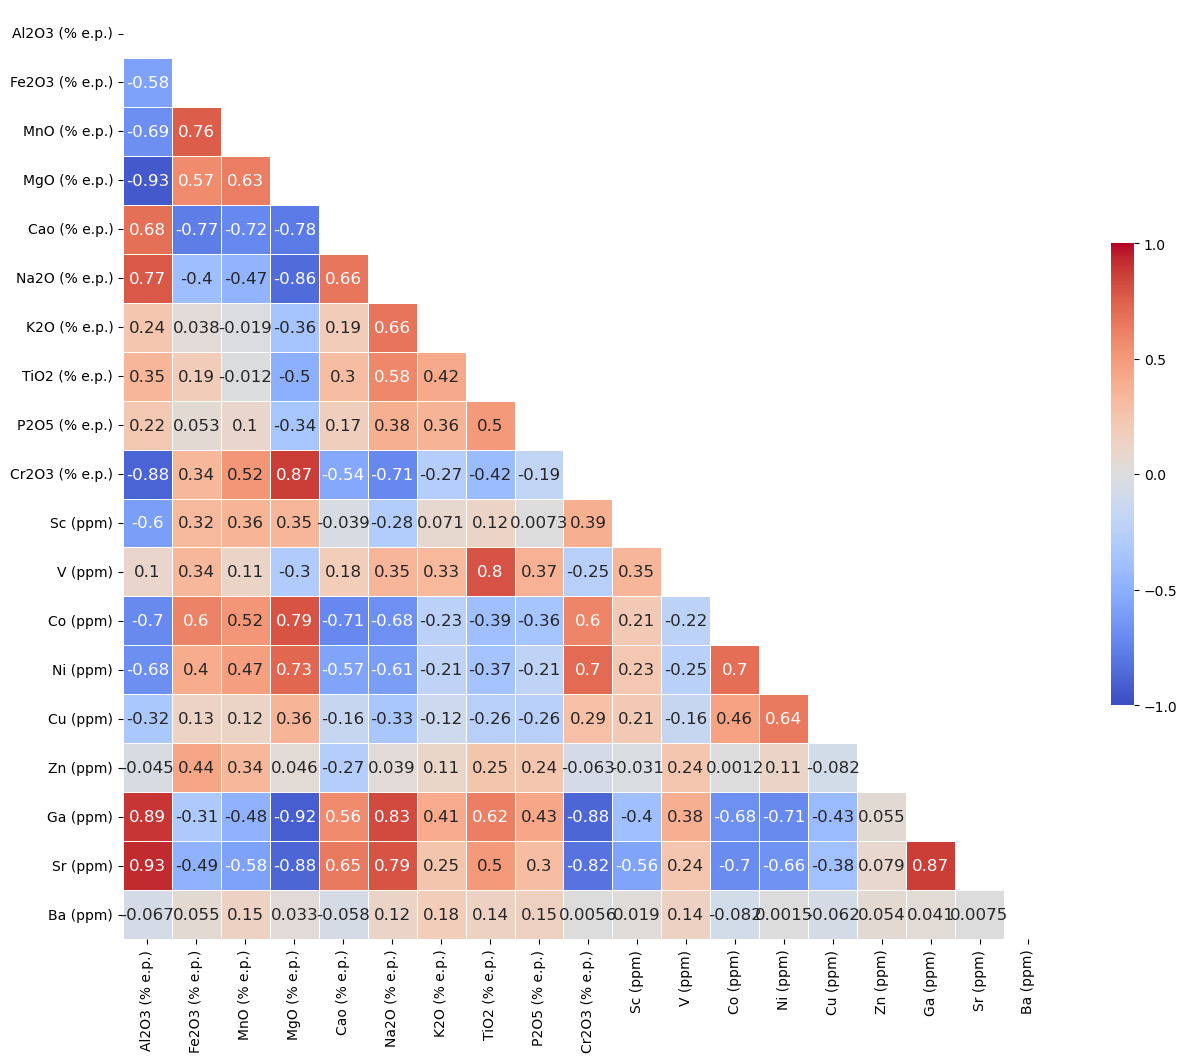

In [5]:
# display the correlation matrix
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)]= True

f, ax = plt.subplots(figsize=(15, 15)) 
heatmap = sns.heatmap(corr, 
                      mask = mask,
                      square = True,
                      linewidths = .5,
                      cmap = 'coolwarm',
                      cbar_kws = {'shrink': .4, 
                                "ticks" : [-1, -.5, 0, 0.5, 1]},
                      vmin = -1, 
                      vmax = 1,
                      annot = True,
                      annot_kws = {"size": 12})
# Add the column names as labels
ax.set_yticklabels(corr.columns, rotation = 0)
ax.set_xticklabels(corr.columns)
sns.set_style({'xtick.bottom': True}, {'ytick.left': True});
plt.savefig('1-corr.png')

In [6]:
# count the number of samples from each category
df_train['Roca'].value_counts()

M     52
UM    36
Name: Roca, dtype: int64

M     52
UM    36
Name: Roca, dtype: int64

In [7]:
# replace categorical values
le = LabelEncoder()
le.fit(df_train['Roca'])
df_train['Roca'] = le.transform(df_train['Roca'])

In [8]:
#print(df_train)

In [9]:
#prepare data for training
X_train = df_train.loc[:, df_train.columns != 'Roca']
y_train = df_train['Roca']

In [10]:
## normalize
#scaler = Normalizer()
#X_train_norm = scaler.fit_transform(X_train)
X_train_norm = X_train


In [11]:
X_train_norm

Al2O3 (% e.p.)  Fe2O3 (% e.p.)  MnO (% e.p.)  MgO (% e.p.)  Cao (% e.p.)  \
0             5.49           10.25         0.188         18.55         10.13   
1            17.93            8.80         0.150         10.28         13.04   
2            20.10            7.40         0.125          8.24         13.52   
3            14.95           11.25         0.184         10.11         10.19   
4            17.56            8.84         0.149         10.60         10.60   
..             ...             ...           ...           ...           ...   
83           15.77           12.35         0.200         11.88          7.97   
84           12.80           12.83         0.270         13.94          7.90   
85           19.54           11.70         0.180          7.50         12.09   
86            4.02            8.76         0.155         21.66         14.01   
87            4.19            9.27         0.167         23.46         11.53   

    Na2O (% e.p.)  K2O (% e.p.)  TiO2 (% e.p.)  P2O5 (% e.p.)  Cr2O3 (% e.p.)  \
0            0.38          0.20          0.278           0.01        0.146145   
1            0.71          0.09          0.187           0.01        0.021922   
2            0.77          0.11          0.156           0.01        0.011692   
3            0.89          0.35          0.309           0.03        0.073072   
4            0.68          0.10          0.187           0.02        0.024845   
..            ...           ...            ...            ...             ...   
83           1.09          0.69          0.410           0.01        0.101000   
84           0.89          0.50          0.310           0.50        0.188000   
85           1.17          0.34          1.330           0.14        0.010000   
86           0.42          0.05          0.249           0.02        0.431128   
87           0.32          0.09          0.271           0.02        0.334672   

    Sc (ppm)  V (ppm)  Co (ppm)  Ni (ppm)  Cu (ppm)  Zn (ppm)  Ga (ppm)  \
0         59      203      62.0       120       130        60       7.0   
1         39      148      47.0        40        60        60      14.0   
2         32      128      40.0        40        60        60      15.0   
3         38      318      32.0       120        50        80      15.0   
4         34      140      51.0        30        60        60      14.0   
..       ...      ...       ...       ...       ...       ...       ...   
83        34      184      77.8       399       295        88      14.4   
84        41      210      50.7       358        66       120      14.4   
85        43      373      31.0        20        26       134      18.0   
86        57      163      71.0       319        86        38       5.0   
87        51      142      63.0       304       101        46       4.0   

    Sr (ppm)  Ba (ppm)  
0       38.0      25.0  
1      168.0      18.0  
2      216.0      15.0  
3      162.0      52.0  
4      185.0      27.0  
..       ...       ...  
83     163.6      90.0  
84     123.9      61.0  
85     258.0      38.0  
86      34.0      18.0  
87      27.0      20.0  

[88 rows x 19 columns]

Al2O3 (% e.p.)  Fe2O3 (% e.p.)  MnO (% e.p.)  MgO (% e.p.)  Cao (% e.p.)  \
0             5.49           10.25         0.188         18.55         10.13   
1            17.93            8.80         0.150         10.28         13.04   
2            20.10            7.40         0.125          8.24         13.52   
3            14.95           11.25         0.184         10.11         10.19   
4            17.56            8.84         0.149         10.60         10.60   
..             ...             ...           ...           ...           ...   
83           15.77           12.35         0.200         11.88          7.97   
84           12.80           12.83         0.270         13.94          7.90   
85           19.54           11.70         0.180          7.50         12.09   
86            4.02            8.76         0.155         21.66         14.01   
87            4.19            9.27         0.167         23.46         11.53   

    Na2O (% e.p.)  K2O (% e.p.)  TiO2 (% e.p.)  P2O5 (% e.p.)  Cr2O3 (% e.p.)  \
0            0.38          0.20          0.278           0.01        0.146145   
1            0.71          0.09          0.187           0.01        0.021922   
2            0.77          0.11          0.156           0.01        0.011692   
3            0.89          0.35          0.309           0.03        0.073072   
4            0.68          0.10          0.187           0.02        0.024845   
..            ...           ...            ...            ...             ...   
83           1.09          0.69          0.410           0.01        0.101000   
84           0.89          0.50          0.310           0.50        0.188000   
85           1.17          0.34          1.330           0.14        0.010000   
86           0.42          0.05          0.249           0.02        0.431128   
87           0.32          0.09          0.271           0.02        0.334672   

    Sc (ppm)  V (ppm)  Co (ppm)  Ni (ppm)  Cu (ppm)  Zn (ppm)  Ga (ppm)  \
0         59      203      62.0       120       130        60       7.0   
1         39      148      47.0        40        60        60      14.0   
2         32      128      40.0        40        60        60      15.0   
3         38      318      32.0       120        50        80      15.0   
4         34      140      51.0        30        60        60      14.0   
..       ...      ...       ...       ...       ...       ...       ...   
83        34      184      77.8       399       295        88      14.4   
84        41      210      50.7       358        66       120      14.4   
85        43      373      31.0        20        26       134      18.0   
86        57      163      71.0       319        86        38       5.0   
87        51      142      63.0       304       101        46       4.0   

    Sr (ppm)  Ba (ppm)  
0       38.0      25.0  
1      168.0      18.0  
2      216.0      15.0  
3      162.0      52.0  
4      185.0      27.0  
..       ...       ...  
83     163.6      90.0  
84     123.9      61.0  
85     258.0      38.0  
86      34.0      18.0  
87      27.0      20.0  

[88 rows x 19 columns]

#### <span style='background :yellow' >RANDOM FOREST VERSION OF SKLEARN</span>

In [12]:
rf = RandomForestClassifier()

#### Hyperparameter optimization

In [13]:
parameters = {'n_estimators': [50,100,175,200,225,250],
                'max_depth' : [8,10,12,14],
                'criterion' :['gini', 'entropy']}


In [14]:
from sklearn.model_selection import GridSearchCV

gridsearch = GridSearchCV(rf, param_grid=parameters)
gridsearch.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [8, 10, 12, 14],
                         'n_estimators': [50, 100, 175, 200, 225, 250]})

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [8, 10, 12, 14],
                         'n_estimators': [50, 100, 175, 200, 225, 250]})

In [15]:
#Best configuration
gridsearch.best_params_

{'criterion': 'gini', 'max_depth': 8, 'n_estimators': 50}

{'criterion': 'gini', 'max_depth': 8, 'n_estimators': 50}

#### Train random forest model with the best configuration

In [16]:
# Random Forest
random_forest = RandomForestClassifier(criterion = 'gini', max_depth = 8, n_estimators = 50)
random_forest.fit(X_train, y_train)
random_forest_preds = random_forest.predict(df_test)
#print('The accuracy of the Random Forests model is :\t',metrics.accuracy_score(random_forest_preds,Y_test))
#print(random_forest_preds)

#### <span style='background :yellow' >Interpret model predictions with SHAP</span>

In [17]:
# Import the package
import shap
shap.initjs()

In [18]:
explainer = shap.TreeExplainer(random_forest)

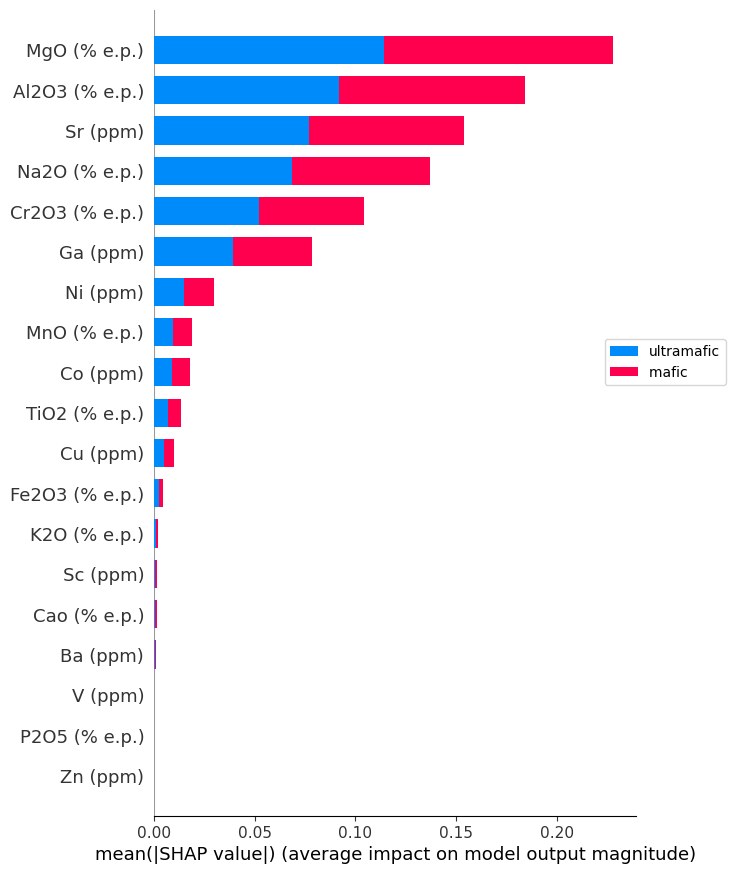

In [19]:
shap_values = explainer.shap_values(X_train)

#importance of attributes
shap.summary_plot(shap_values,X_train, plot_type="bar",show=False, class_names=['mafic ', 'ultramafic'])
plt.legend(loc='best', bbox_to_anchor=(0.9, 0.3, 0.3, 0.3))
plt.tight_layout(pad=2)
plt.savefig('1-ordenImportancia-columns.png')

#### SHAP values - mafic (0)

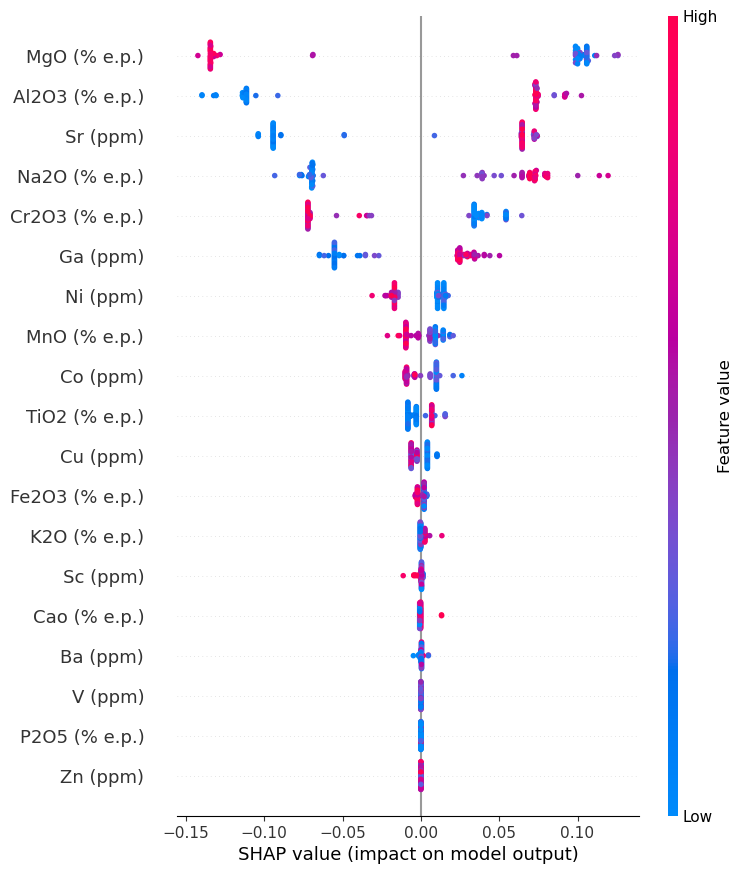

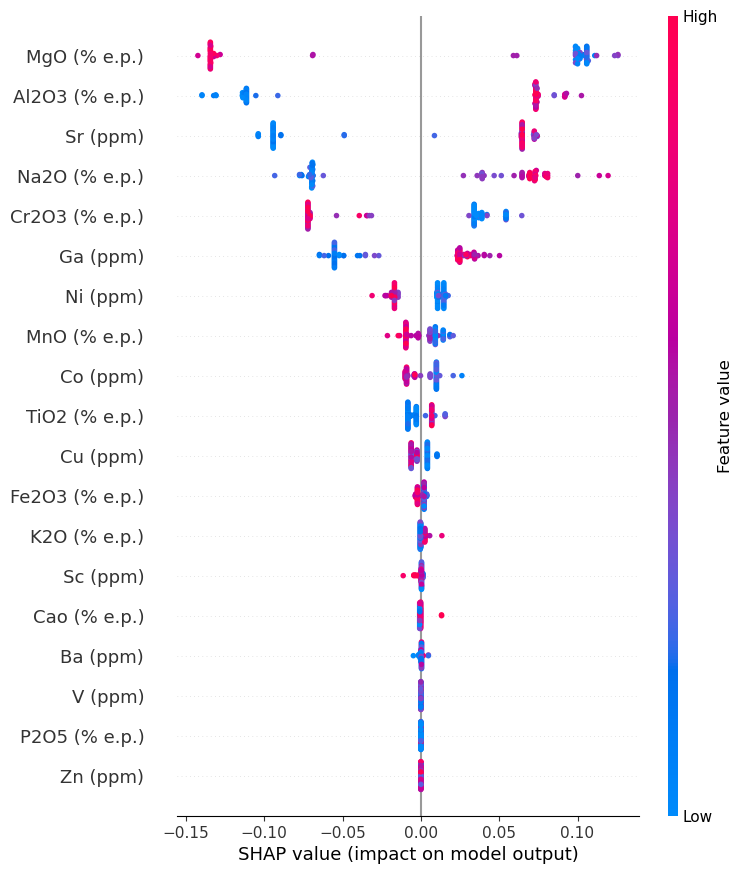

In [20]:
shap.summary_plot(shap_values[0], X_train,show=False) ##M
plt.tight_layout(pad=2)
plt.savefig('1-shap-m.png')
plt.show()

#### SHAP values - ultramafic (1)

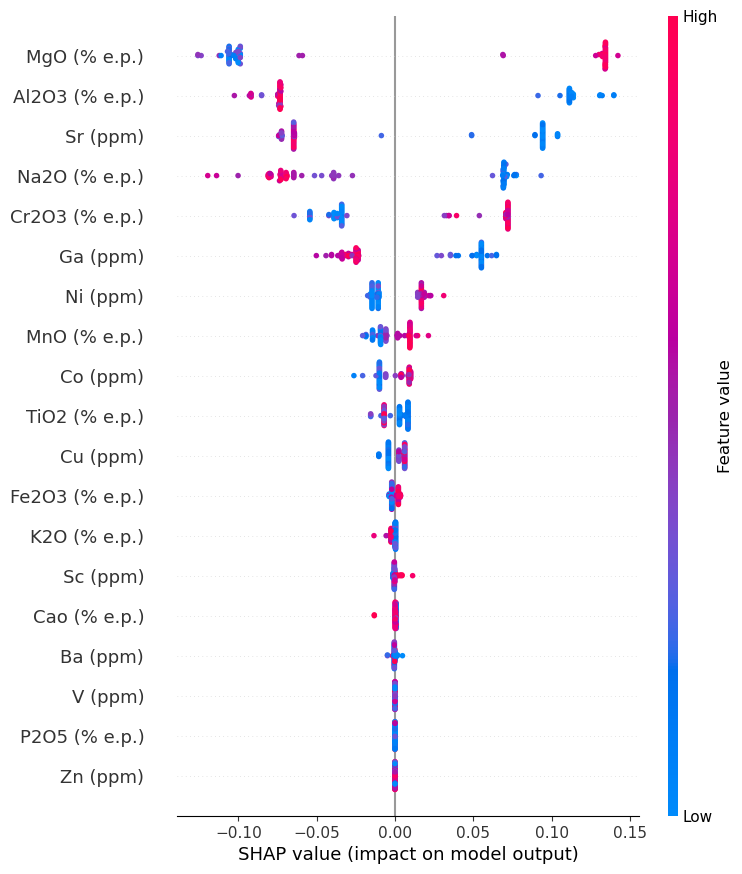

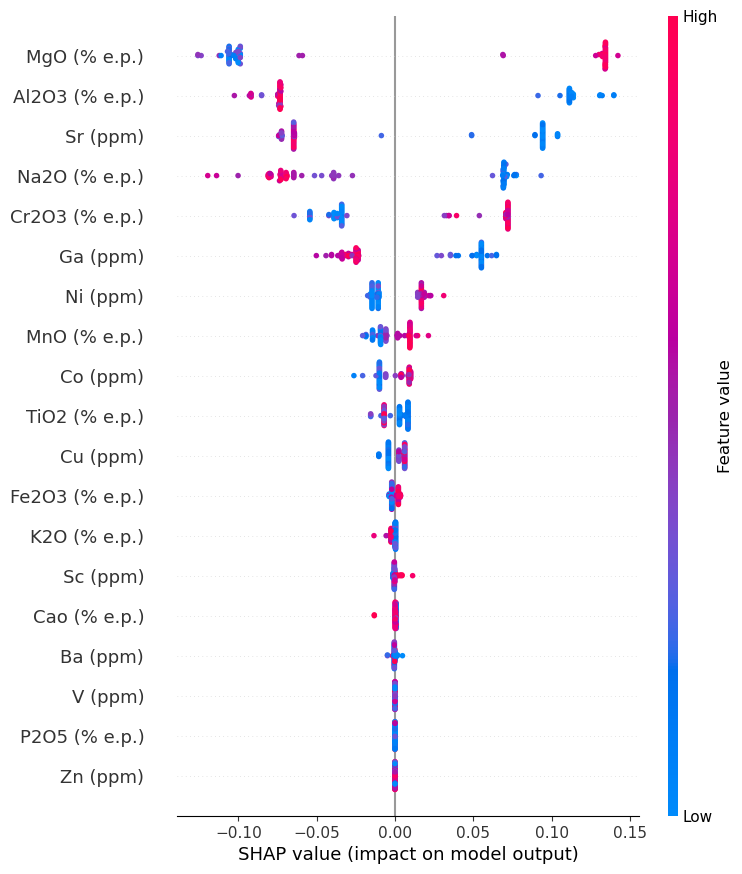

In [21]:
shap.summary_plot(shap_values[1], X_train,show=False) ##UM
plt.tight_layout(pad=2)
plt.savefig('1-shap-um.png')
plt.show()

#### <span style='background :yellow' > SHAP forces plots for local interpretability. Force plot for sample </span>

In [22]:
#print(df_test.loc[[0]])

In [23]:
choosen_instance = df_test.loc[[0]]
shap_values = explainer.shap_values(choosen_instance)
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1], choosen_instance)

In [24]:
#print(df_test.loc[[1]])

In [25]:
choosen_instance = df_test.loc[[1]]
shap_values = explainer.shap_values(choosen_instance)
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1], choosen_instance)

In [26]:
#print(df_test.loc[[2]])

In [27]:
choosen_instance = df_test.loc[[2]]
shap_values = explainer.shap_values(choosen_instance)
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1], choosen_instance)

In [28]:
#print(df_test.loc[[9]])

In [29]:
choosen_instance = df_test.loc[[9]]
shap_values = explainer.shap_values(choosen_instance)
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1], choosen_instance)

In [30]:
#print(df_test.loc[[90]])

In [31]:
choosen_instance = df_test.loc[[90]]
shap_values = explainer.shap_values(choosen_instance)
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1], choosen_instance)

In [32]:
#print(df_test.loc[[5]])

In [33]:
choosen_instance = df_test.loc[[5]]
shap_values = explainer.shap_values(choosen_instance)
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1], choosen_instance)

In [34]:
#print(df_test.loc[[51]])

In [35]:
choosen_instance = df_test.loc[[51]]
shap_values = explainer.shap_values(choosen_instance)
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1], choosen_instance)

####  <span style='background :yellow' >MODEL EVALUATION</span>

In [36]:
import numpy as np
from sklearn.metrics import f1_score,precision_score

In [37]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [38]:
print(classification_report(random_forest_preds,[0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,1,0,0,0,
0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,1,1,1,1]))


              precision    recall  f1-score   support

           0       0.99      0.95      0.97        84
           1       0.69      0.90      0.78        10

    accuracy                           0.95        94
   macro avg       0.84      0.93      0.88        94
weighted avg       0.96      0.95      0.95        94

              precision    recall  f1-score   support

           0       0.99      0.95      0.97        84
           1       0.69      0.90      0.78        10

    accuracy                           0.95        94
   macro avg       0.84      0.93      0.88        94
weighted avg       0.96      0.95      0.95        94



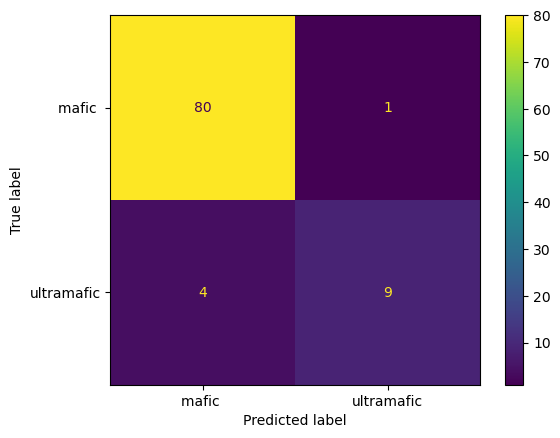

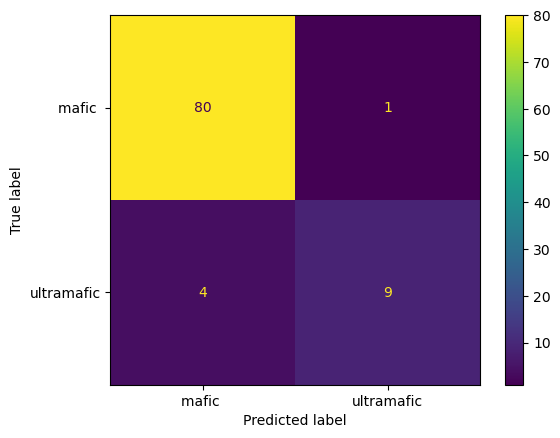

In [39]:
cm = confusion_matrix([0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,1,0,0,0,
0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,1,1,1,1], random_forest_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['mafic ', 'ultramafic'])
disp.plot()

In [40]:
f1_score([0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,1,0,0,0,
0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,1,1,1,1], random_forest_preds)

0.7826086956521738

0.7826086956521738

In [41]:
precision_score([0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,1,0,0,0,
0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,1,1,1,1], random_forest_preds)

0.9

0.9

In [42]:
accuracy_score([0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,1,0,0,0,
0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,1,1,1,1], random_forest_preds)

0.9468085106382979

0.9468085106382979

#### <span style='background :#39ff14' >CT-EF08_004 data test</span>

In [43]:
#upload test data (Juan,2023)
df_test2 = pd.read_excel('CT-EF08_004.xlsx')
df_test2.head()

Al2O3 (% e.p.)  Fe2O3 (% e.p.)  MnO (% e.p.)  MgO (% e.p.)  Cao (% e.p.)  \
0       21.727820       12.077910   1742.762776      9.911536      9.833751   
1       20.968786       11.847360   1716.675208      9.495687      9.496545   
2       21.347942       10.847661   1665.150405      9.413419      9.748907   
3       20.405674        9.962693   1329.690629      7.873037      9.833952   
4       22.104225       13.406303   1923.365847      6.082428     10.588413   

   Na2O (% e.p.)  K2O (% e.p.)  TiO2 (% e.p.)  P2O5 (% e.p.)  Cr2O3 (% e.p.)  \
0       0.835456      0.132473       0.333523       0.018324        0.019291   
1       0.821853      0.096329       0.350144       0.016031        0.012568   
2       0.794956      0.084293       0.350166       0.020613        0.012715   
3       0.606392      0.192692       0.366883       0.027487        0.011107   
4       0.970143      0.144506       1.700854       0.265686        0.009499   

   Sc (ppm)  V (ppm)  Co (ppm)  Ni (ppm)  Cu (ppm)  Zn (ppm)  Ga (ppm)  \
0        28      243        60        38        92        94        20   
1        24      243        62        35        90        93        20   
2        27      188        54        32        77        91        20   
3        28      228        47        21        59        96        10   
4        30      382        21        16        39       109        20   

   Sr (ppm)  Ba (ppm)  
0       211        40  
1       204        20  
2       215        30  
3       174        20  
4       272        30

Al2O3 (% e.p.)  Fe2O3 (% e.p.)  MnO (% e.p.)  MgO (% e.p.)  Cao (% e.p.)  \
0       21.727820       12.077910   1742.762776      9.911536      9.833751   
1       20.968786       11.847360   1716.675208      9.495687      9.496545   
2       21.347942       10.847661   1665.150405      9.413419      9.748907   
3       20.405674        9.962693   1329.690629      7.873037      9.833952   
4       22.104225       13.406303   1923.365847      6.082428     10.588413   

   Na2O (% e.p.)  K2O (% e.p.)  TiO2 (% e.p.)  P2O5 (% e.p.)  Cr2O3 (% e.p.)  \
0       0.835456      0.132473       0.333523       0.018324        0.019291   
1       0.821853      0.096329       0.350144       0.016031        0.012568   
2       0.794956      0.084293       0.350166       0.020613        0.012715   
3       0.606392      0.192692       0.366883       0.027487        0.011107   
4       0.970143      0.144506       1.700854       0.265686        0.009499   

   Sc (ppm)  V (ppm)  Co (ppm)  Ni (ppm)  Cu (ppm)  Zn (ppm)  Ga (ppm)  \
0        28      243        60        38        92        94        20   
1        24      243        62        35        90        93        20   
2        27      188        54        32        77        91        20   
3        28      228        47        21        59        96        10   
4        30      382        21        16        39       109        20   

   Sr (ppm)  Ba (ppm)  
0       211        40  
1       204        20  
2       215        30  
3       174        20  
4       272        30

In [44]:
random_forest_preds2 = random_forest.predict(df_test2)

In [45]:
print(classification_report(random_forest_preds2,[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,1,0,1,1,1,1,1,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        95
           1       0.94      0.94      0.94        34

    accuracy                           0.97       129
   macro avg       0.96      0.96      0.96       129
weighted avg       0.97      0.97      0.97       129

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        95
           1       0.94      0.94      0.94        34

    accuracy                           0.97       129
   macro avg       0.96      0.96      0.96       129
weighted avg       0.97      0.97      0.97       129



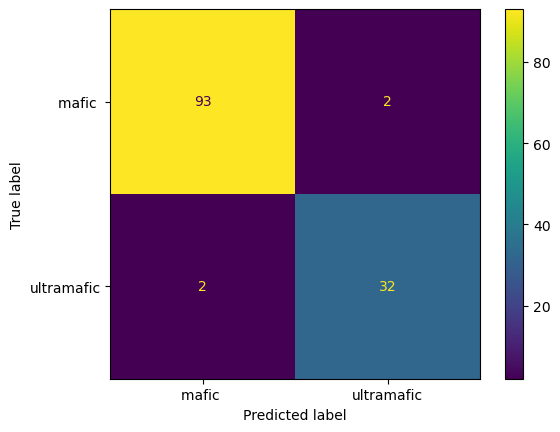

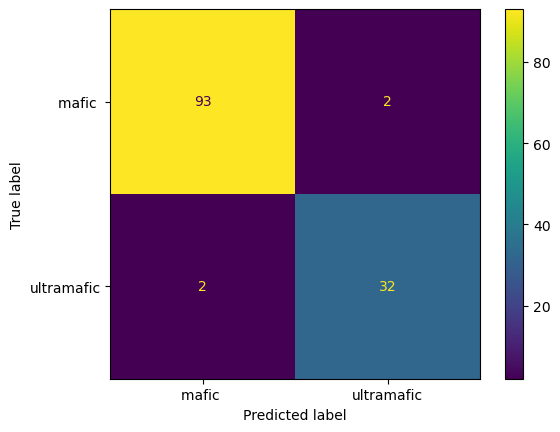

In [46]:
cm = confusion_matrix([0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,1,0,1,1,1,1,1,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1], random_forest_preds2)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['mafic ', 'ultramafic'])
disp.plot()

In [47]:
f1_score([0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,1,0,1,1,1,1,1,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1], random_forest_preds2)

0.9411764705882353

0.9411764705882353

In [48]:
precision_score([0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,1,0,1,1,1,1,1,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1], random_forest_preds2)

0.9411764705882353

0.9411764705882353

In [49]:
accuracy_score([0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,1,0,1,1,1,1,1,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1], random_forest_preds2)

0.9689922480620154

0.9689922480620154